In [72]:
import pandas as pd
import matplotlib
import seaborn as sns


In [73]:
df = pd.read_csv('CAGEDLIGTH.csv',encoding = 'iso-8859-1', delimiter=",", low_memory=False)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2616053 entries, 0 to 2616052
Data columns (total 21 columns):
 #   Column                 Dtype 
---  ------                 ----- 
 0   Unnamed: 0             int64 
 1   Admitidos/Desligados   int64 
 2   Competencia Declarada  int64 
 3   Municipio              int64 
 4   CBO 2002 Ocupacao      int64 
 5   CNAE 1.0 Classe        int64 
 6   CNAE 2.0 Classe        int64 
 7   CNAE 2.0 Subclas       int64 
 8   Grau Instrucao         int64 
 9   IBGE Subsetor          int64 
 10  Idade                  int64 
 11  Ind Aprendiz           int64 
 12  Ind Portador Defic     int64 
 13  Raca Cor               int64 
 14  Salario Mensal         object
 15  Saldo Mov              int64 
 16  Sexo                   int64 
 17  Tipo Estab             int64 
 18  Tipo Defic             int64 
 19  Tipo Mov Desagregado   int64 
 20  UF                     int64 
dtypes: int64(20), object(1)
memory usage: 419.1+ MB


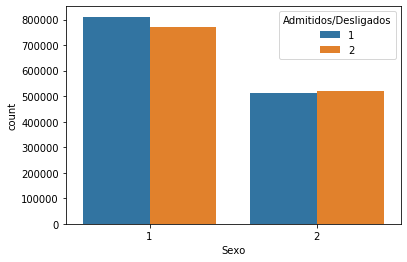

In [75]:
sns.countplot(x='Sexo', data = df, hue= 'Admitidos/Desligados')

In [76]:
df.groupby(by='Sexo')['Idade'].mean()

Sexo
1    32.755260
2    31.288515
Name: Idade, dtype: float64

In [77]:
df['Salario Mensal'] =  df['Salario Mensal'].apply(lambda x :  x.replace(',','.'))


In [78]:
df["Salario Mensal"] = pd.to_numeric(df["Salario Mensal"], downcast="float")

In [79]:
df.groupby(by='Sexo')['Salario Mensal'].mean()

Sexo
1    1717.463989
2    1547.252441
Name: Salario Mensal, dtype: float32

In [80]:
df.groupby(by='Raca Cor')['Salario Mensal'].mean()

Raca Cor
1    1612.451660
2    1846.157959
4    1450.593994
6    2096.711182
8    1483.384033
9    1530.390137
Name: Salario Mensal, dtype: float32

In [81]:
Raca = {1 : 'INDIGENA', 2: 'BRANCA',  4: 'PRETA',  6: 'AMARELA',  8: 'PARDA',  9: 'NAO IDENT'}
Sexo = {1: 'MASCULINO', 2:'FEMININO'}
AdmDem = {1: 'ADMISSÃO', 2: 'DESLIGAMENTO'}
TipoMovDesagregado = {
1:'Admissão por Primeiro Emprego',
2:'Admissão por Reemprego', 
3:'Admissão por Transferência', 
4:'Desligamento por Demissão sem Justa Causa', 
5:'Desligamento por Demissão com Justa Causa', 
6:'Desligamento a Pedido',
7:'Desligamento por Aposentadoria', 
8:'Desligamento por Morte', 
9:'Desligamento por Transferência', 
10:'Admissão por Reintegraçao', 
11:'Desligamento por Término de Contrato',
25:'Contrato Trabalho Prazo Determinado', 
43:'Término Contrato Trabalho Prazo Determinado',
90:'Desliamento por Acordo Empregado e Empregador'}

In [82]:
df['Raca Cor'] = df['Raca Cor'].map(Raca)
df['Sexo'] = df['Sexo'].map(Sexo)
df['Admitidos/Desligados'] = df['Admitidos/Desligados'].map(AdmDem)
df['Tipo Mov Desagregado'] = df['Tipo Mov Desagregado'].map(TipoMovDesagregado)

In [83]:
df.groupby(by='Raca Cor')['Salario Mensal'].mean()

Raca Cor
AMARELA      2096.711182
BRANCA       1846.157959
INDIGENA     1612.451660
NAO IDENT    1530.390137
PARDA        1483.384033
PRETA        1450.593994
Name: Salario Mensal, dtype: float32

In [84]:
df['Sexo'].value_counts()

MASCULINO    1582962
FEMININO     1033091
Name: Sexo, dtype: int64

In [85]:
df.groupby(by=['Sexo','Admitidos/Desligados'])['Salario Mensal'].mean()

Sexo       Admitidos/Desligados
FEMININO   ADMISSÃO                1506.998779
           DESLIGAMENTO            1587.116089
MASCULINO  ADMISSÃO                1663.895874
           DESLIGAMENTO            1773.762817
Name: Salario Mensal, dtype: float32

In [86]:
df['Tipo Mov Desagregado'].value_counts()

Admissão por Reemprego                           1130101
Desligamento por Demissão sem Justa Causa         705260
Desligamento a Pedido                             320960
Desligamento por Término de Contrato              185020
Admissão por Primeiro Emprego                     123160
Contrato Trabalho Prazo Determinado                70749
Término Contrato Trabalho Prazo Determinado        36985
Desligamento por Demissão com Justa Causa          19761
Desliamento por Acordo Empregado e Empregador      17754
Desligamento por Morte                              4415
Admissão por Reintegraçao                           1173
Desligamento por Aposentadoria                       715
Name: Tipo Mov Desagregado, dtype: int64

In [92]:
df[df['Admitidos/Desligados'] == 'DESLIGAMENTO']['Tipo Mov Desagregado'].value_counts()

Desligamento por Demissão sem Justa Causa        705260
Desligamento a Pedido                            320960
Desligamento por Término de Contrato             185020
Término Contrato Trabalho Prazo Determinado       36985
Desligamento por Demissão com Justa Causa         19761
Desliamento por Acordo Empregado e Empregador     17754
Desligamento por Morte                             4415
Desligamento por Aposentadoria                      715
Name: Tipo Mov Desagregado, dtype: int64